<a href="https://colab.research.google.com/github/Raziel-JKM/Mini-Project/blob/main/Codestats%20Project-4/%EC%83%81%ED%92%88%20%EB%A6%AC%EB%B7%B0%20%EB%B6%84%EC%84%9D%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EC%B6%94%EC%B2%9C%20%EC%97%AC%EB%B6%80%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#프로젝트 목표
- 상품 리뷰 데이터 분석을 통하여 상품 추천 여부를 예측하는 분류 모델 수행
- 상품 추천 여부에 영향을 미치는 특성 데이터들에 대한 데이터 분석 수행


데이터 출처
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [ ]:
#!pip install wordcloud

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Womens Clothing E-Commerce Reviews(수정).csv 데이터를 pandas를 사용하여 dataframe 형태로 불러옵니다.
df_origin = pd.read_csv("/content/Womens Clothing E-Commerce Reviews(수정).csv")


In [ ]:
# 5개의 데이터 샘플을 출력합니다.
df_origin.head()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,0,0,Initmates,Intimate,Intimates
1,1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,0,4,General,Dresses,Dresses
2,2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,1,0,General,Dresses,Dresses
3,3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,0,0,General Petite,Bottoms,Pants
4,4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,0,6,General,Tops,Blouses


In [ ]:
# dataframe의 정보를 요약해서 출력
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Unnamed: 0.1             23486 non-null  int64 
 2   Clothing ID              23486 non-null  int64 
 3   Age                      23486 non-null  int64 
 4   Title                    19676 non-null  object
 5   Review Text              22641 non-null  object
 6   Rating                   23486 non-null  int64 
 7   Recommended IND          23486 non-null  int64 
 8   Positive Feedback Count  23486 non-null  int64 
 9   Division Name            23472 non-null  object
 10  Department Name          23472 non-null  object
 11  Class Name               23472 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


In [ ]:
# 수치형 변수의 데이터 정보를 요약하여 출력
df_origin.describe()

,Unnamed: 0,Unnamed: 0.1,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,11742.500000,918.118709,43.198544,4.196032,0.177638,2.535936
std,6779.968547,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,5871.250000,861.000000,34.000000,4.000000,0.000000,0.000000
50%,11742.500000,11742.500000,936.000000,41.000000,5.000000,0.000000,1.000000
75%,17613.750000,17613.750000,1078.000000,52.000000,5.000000,0.000000,3.000000
max,23485.000000,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
# 결측값을 처리하기 전에 우선 의미 없는 변수인 'Unnamed: 0, Unnamed: 0.1'를 drop을 사용하여 삭제
df_clean = df_origin.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
# 결측값 정보를 출력
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
# 아래 3개의 변수들의 결측값 정보를 알아보고 싶어서 그 데이터들을 출력
df_clean[df_clean['Division Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,0,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,0,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,0,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,0,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,0,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,0,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,0,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,0,0,NaN,NaN,NaN


In [ ]:
# 결측값이 아닌 부분을 골라내어 df_clasn에 저장
df_clean = df_clean[~df_clean['Review Text'].isnull()]

In [ ]:
# 결측값 정보를 출력
df_clean.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

#Title word cloud¶

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [ ]:
# 'Title'의 결측값을 삭제
df_clean_title = df_clean[~df_clean['Title'].isnull()]

# findall 함수를 사용하여 띄어 쓰기 단위로 글자(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean_title['Title'].str.lower().str.cat(sep=' ')) 

In [ ]:
# nltk에서 지원하는 'stopwords'를 다운
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 영어 'stopwords'를 가져옵니다.
en_stops = set(stopwords.words('english'))

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 'made',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'issues',
 'nice',
 'body',
 'need',
 'least',
 'average',
 'height',
 'taller',
 'looks',
 'great',
 'white',
 'pants',
 'super',
 'cute',
 'cozy',
 'stylish',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 "i'm",
 'torn',
 'looks',
 'like',
 'like',
 'love',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'oerson',
 'love',
 'pants',
 'mehh',
 'love',
 'dress',
 'lovely',
 'beautifully',
 'cut',
 'lightweight',
 'coat',
 'soft',
 'lovely',
 'things',
 'know',
 'beautiful',
 'love',
 'two',
 'tone',
 'design',
 'love',
 'color',
 'love',
 'embroidery',
 'cute',
 'fall',


In [ ]:
# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#Review Text word cloud¶

In [ ]:
# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean['Review Text'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 "i'm",
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 "5'8",
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',

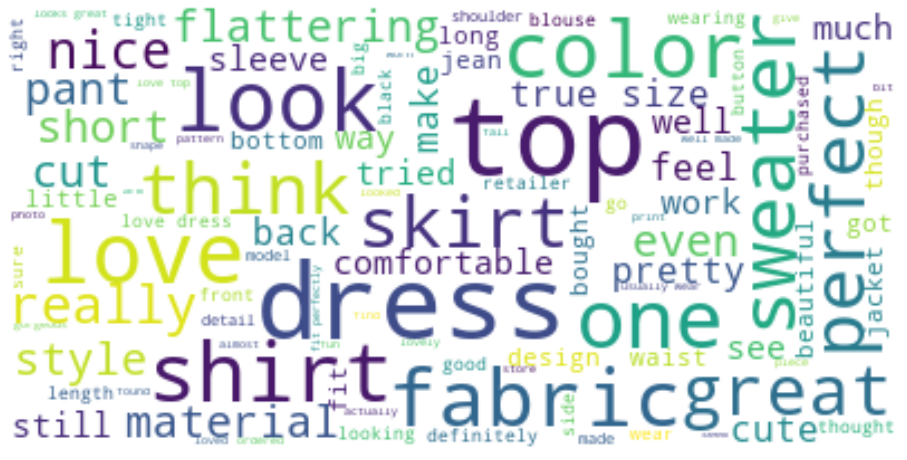

In [ ]:
# 출력 사이즈를 설정
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Recommended IND 시각화¶

0    18540
1     4101
Name: Recommended IND, dtype: int64

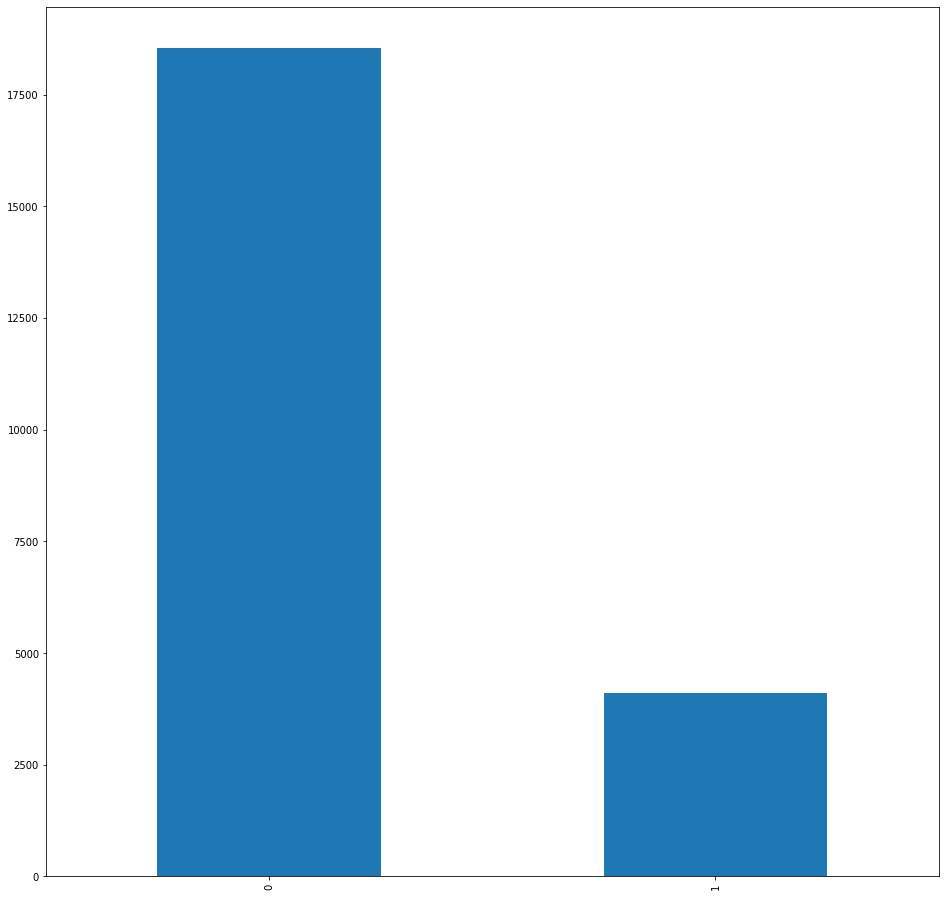

In [ ]:
# 분포를 막대 그래프를 사용하여 출력합니다.
df_clean['Recommended IND'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인합니다.
df_clean['Recommended IND'].value_counts()

#자연어 전 처리 - Tfidf¶

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer (stop_words 는 영어로 설정)
vectorizer = TfidfVectorizer(stop_words = 'english')

# 소문자화 'Review Text'데이터를 Tfidf로 변환
X = vectorizer.fit_transform(df_clean['Review Text'].str.lower())

In [ ]:
# 변환된 X의 크기를 살펴봅니다.
X.shape

(22641, 13855)

In [ ]:
# 예측해야 할 변수 'Recommended IND' 만을 선택하여 numpy 형태로 y에 저장
y = df_clean['Recommended IND']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용

In [ ]:
from sklearn.model_selection import train_test_split

#train_test_split을 사용 분리
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#기본 분류 모델 학습 - 의사결정나무¶
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 DecisionTreeClassifier class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# score 함수를 사용하여 모델의 성능을 출력
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.7988518436741002


In [ ]:
#다양한 분류 모델 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB-M', MultinomialNB()))  # 멀티노미얼 나이브 베이즈
models.append(('NB-B', BernoulliNB()))  # 베르누이 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

KNN - train_score : 0.885987, test score : 0.831972
NB-M - train_score : 0.836020, test score : 0.814749
NB-B - train_score : 0.907078, test score : 0.866416
RF - train_score : 0.999945, test score : 0.843895
SVM - train_score : 0.821996, test score : 0.806359
XGB - train_score : 0.870141, test score : 0.839921


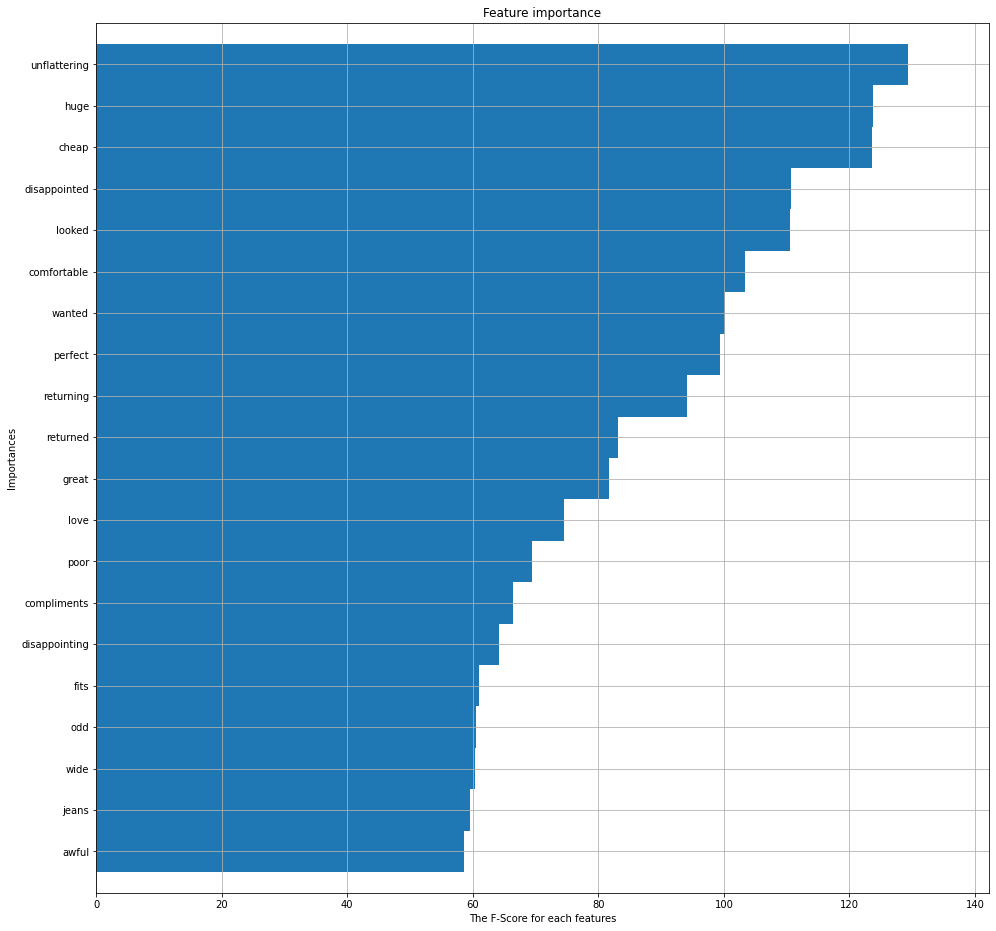

In [ ]:
# xgb 모델에서 변수 중요도를 출력
max_num_features = 20 #y축 숫자 설정 가능
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()

word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

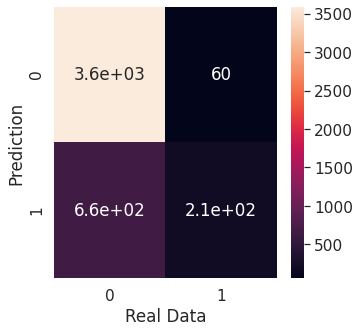

array([[3592,   60],
       [ 665,  212]])

In [ ]:
from sklearn.metrics import confusion_matrix

# 의사결정나무 모델에 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장
model_predition = model.predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용
cm = confusion_matrix(y_test, model_predition)

# 출력 파트 - seaborn의 heatmap을 사용
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()
cm

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `추천함(Pass)` 이라고 예측했을 때, 실제 데이터가 `추천함(Pass)`인 경우의 개수
- **0,1 의 값:** `추천 하지 않음(Fail)` 이라고 예측했을 때, 실제 데이터가 `추천함(Pass)`인 경우의 개수
- **1,0 의 값:** `추천함(Pass)` 이라고 예측했을 때, 실제 데이터가 `추천 하지 않음(Fail)`인 경우의 개수
- **1,1 의 값:** `추천 하지 않음(Fail)` 이라고 에측했을 때, 실제 데이터가 `추천 하지 않음(Fail)`인 경우의 개수

XGBClassifier 모델에서 평가용 데이터(x_test, y_test)의 confusion matrix

In [ ]:
# XGBClassifier의 x_test에 대한 예측값을 구하고 confusion_matrix() 를 사용하면 confusion matrix를 도출
model_predition_XGD = models[-1][1].predict(x_test)

# sklearn에서 제공하는 confusion_matrix를 사용
cm_XGD = confusion_matrix(y_test, model_predition_XGD)
cm_XGD

array([[3592,   60],
       [ 665,  212]])

In [ ]:
#분류 모델의 또 다른 성능 지표로 Precsion과 Recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력
print("Recall score: {}".format(recall_score(y_test, model_predition)))
print("Precision score: {}".format(precision_score(y_test, model_predition)))

Recall score: 0.24173318129988597
Precision score: 0.7794117647058824


In [ ]:
# 0번부터 4번까지 5개를 출력
for i in range(5): 
    
    # 의사결정나무 모델을 사용
    prediction = model.predict(x_test[i])
    print("{} 번째 테스트 데이터 문장: \n{}".format(i, df_clean['Review Text'][i]))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}\n".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터 문장: 
Absolutely wonderful - silky and sexy and comfortable
0 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

1 번째 테스트 데이터 문장: 
Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0

2 번째 테스트 데이터 문장: 
I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
2 번째 테스트 데이터의 예측 



---



---



In [ ]:
# 훈련, 테스트 셋 확인
x_train.shape, y_test.shape, x_test.shape ,y_test.shape

((18112, 13855), (4529,), (4529, 13855), (4529,))

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.9 MB/s 


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import keras
import tensorflow as tf
import IPython
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 97 kB 3.8 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
# 간단한 모델 만들어서 성능을 보기 !
tf.random.set_seed(42)

model2 = Sequential()
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid')) # 00분류니까 노드수 1, 활성함수로는 시그모이드

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

results = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


566/566 [==============================] - 4s 6ms/step - loss: 0.3106 - accuracy: 0.8673 - val_loss: 0.2631 - val_accuracy: 0.8834
Epoch 2/10
566/566 [==============================] - 3s 5ms/step - loss: 0.1837 - accuracy: 0.9256 - val_loss: 0.2753 - val_accuracy: 0.8777
Epoch 3/10
566/566 [==============================] - 3s 5ms/step - loss: 0.1240 - accuracy: 0.9511 - val_loss: 0.3263 - val_accuracy: 0.8711
Epoch 4/10
566/566 [==============================] - 3s 5ms/step - loss: 0.0716 - accuracy: 0.9742 - val_loss: 0.4287 - val_accuracy: 0.8715
Epoch 5/10
566/566 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.5741 - val_accuracy: 0.8682
Epoch 6/10
566/566 [==============================] - 3s 6ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.6699 - val_accuracy: 0.8622
Epoch 7/10
566/566 [==============================] - 3s 6ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.7953 - val_accuracy: 0.8629
Epoch 8/10
566/56

In [ ]:
# 테스트셋 사용해서 결과 보기
model2.evaluate(x_test,  y_test, verbose=2) 

142/142 - 0s - loss: 1.0363 - accuracy: 0.8622


[1.036293625831604, 0.8622212409973145]

## GridSearchCV 사용

In [ ]:
# 모델 만들기
tf.random.set_seed(42)

def model_builder(nodes=16, activation='relu'):

  model = Sequential()
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(nodes, activation=activation))
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model

# keras.wrapper를 활용하여 분류기를 만듭니다
model = KerasClassifier(build_fn=model_builder, verbose=0)

# GridSearch
batch_size = [50, 100, 300]
epochs = [10, 20, 30]
nodes = [64, 128, 256]
activation = ['relu', 'sigmoid']
param_grid = dict(batch_size=batch_size, epochs=epochs, nodes=nodes, activation=activation)


# GridSearch CV를 만들기
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 25.6min finished
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_15/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


In [ ]:
# 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8894652922948202 using {'activation': 'sigmoid', 'batch_size': 300, 'epochs': 10, 'nodes': 256}
Means: 0.8654481371243795, Stdev: 0.003853700420284862 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 64}
Means: 0.8674357732137045, Stdev: 0.004541593596105197 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 128}
Means: 0.8659451206525167, Stdev: 0.002894336207158893 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 10, 'nodes': 256}
Means: 0.8667181332906088, Stdev: 0.002535166807623083 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 64}
Means: 0.8678774833679199, Stdev: 0.0035748191252525383 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 128}
Means: 0.8677672545115153, Stdev: 0.0025873957007595083 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 20, 'nodes': 256}
Means: 0.8644543886184692, Stdev: 0.0032463002474911306 with: {'activation': 'relu', 'batch_size': 50, 'epochs': 30,

Best: 0.8894652922948202 using {'activation': 'sigmoid', 'batch_size': 300, 'epochs': 10, 'nodes': 256}